In [1]:
import d_mg5_data
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [2]:
Rs = [0.1, 0.2, 0.25, 0.3, 0.4]
sig_events = [d_mg5_data.FatJetEvents(channel="VzToZhToVevebb", cut_pt=(800,1000), subjet_radius=R, check_hdf5=True) for R in Rs]
bkg_events = [d_mg5_data.FatJetEvents(channel="VzToQCD", cut_pt=(800,1000), subjet_radius=R, check_hdf5=True) for R in Rs]

DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5


DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.1.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.25.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.25.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.3.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.3.hdf5
DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.4.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.4.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.1.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.1.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.25.hdf5
DataLog: Successfully loading hdf5 file VzToQ

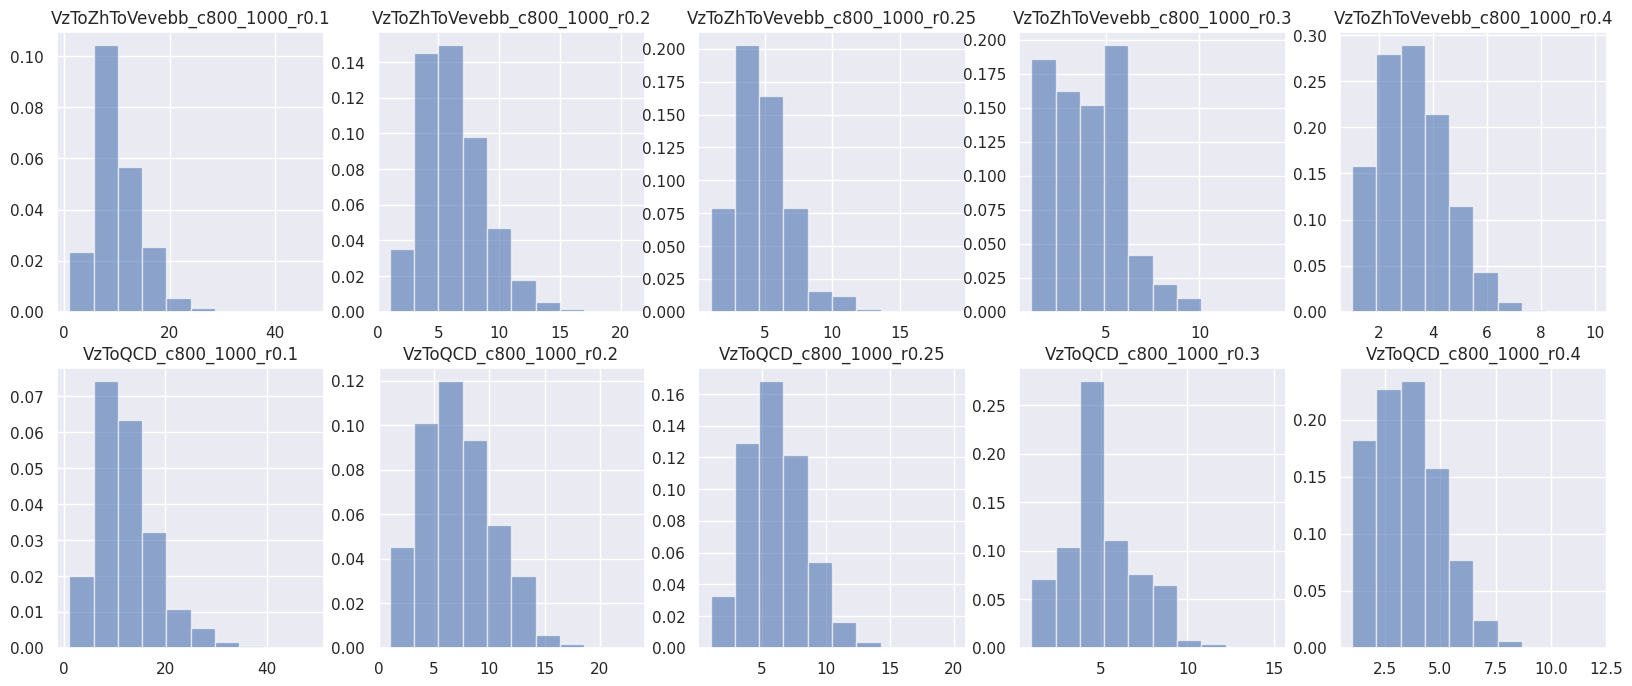

In [3]:
def draw_reclustered_num_ptcs(events, ax):
    num_subjets = ak.num(events.events["fast_pt"], axis=1)
    ax.hist(num_subjets, bins=10, label=events.channel, range=None, 
        alpha=0.6, density=True, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
    ax.set_title(f"{events.channel}_c{800}_{1000}_r{events.subjet_radius}")

fig, axes = plt.subplots(2, len(Rs), figsize=(len(Rs)*4,2*4))
for i in range(len(Rs)):
    draw_reclustered_num_ptcs(sig_events[i], axes[0][i])
    draw_reclustered_num_ptcs(bkg_events[i], axes[1][i])

DataLog: Now loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToZhToVevebb|c800_1000_r0.2.hdf5
DataLog: Now loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5
DataLog: Successfully loading hdf5 file VzToQCD|c800_1000_r0.2.hdf5


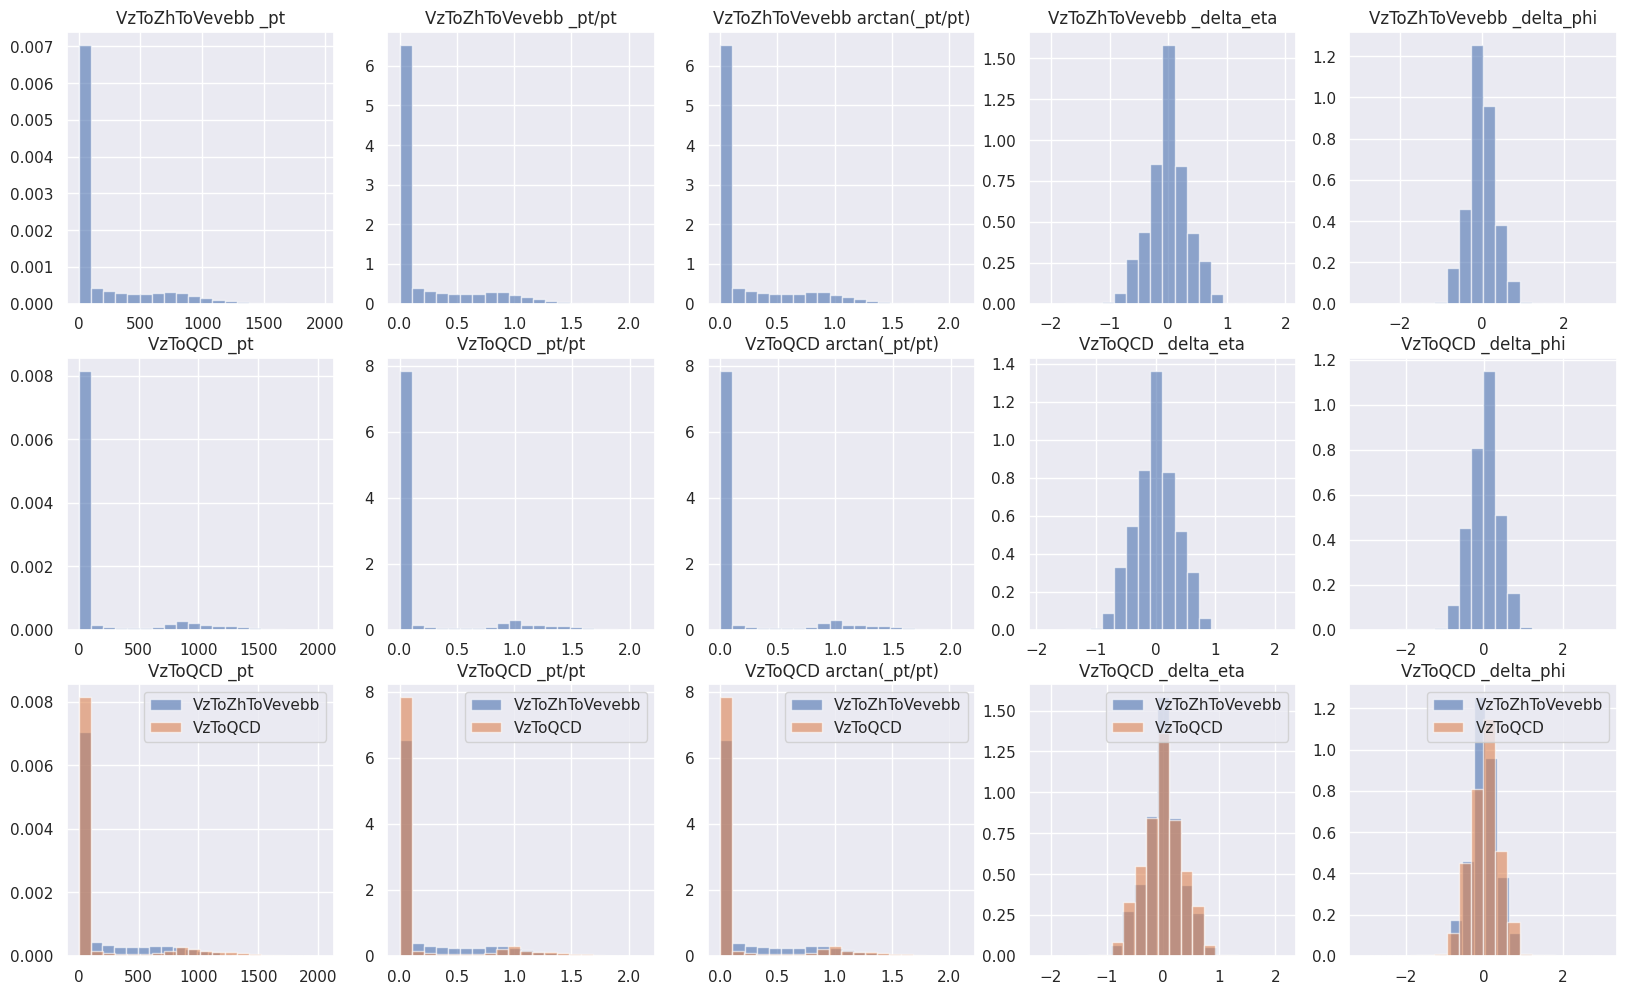

In [4]:
def draw_feature_hist(feature, channel, title, ax):
    ax.hist(feature, bins=20, label=channel, range=None, alpha=0.6, density=True)
    ax.set_title(f"{channel} {title}")

def get_feature_events(events):
    return {
        "_pt"            : ak.ravel(events.events["fast_pt"]),
        "_pt/pt"         : ak.ravel(events.events["fast_pt"] / events.events["fatjet_pt"]),
        "arctan(_pt/pt)" : ak.ravel(events.events["fast_pt"] / events.events["fatjet_pt"]),
        "_delta_eta"     : ak.ravel(events.events["fast_delta_eta"]),
        "_delta_phi"     : ak.ravel(events.events["fast_delta_phi"]),
    }

subjet_radius = 0.2
sig_events    = d_mg5_data.FatJetEvents(channel="VzToZhToVevebb", cut_pt=(800,1000), subjet_radius=subjet_radius, check_hdf5=True)
bkg_events    = d_mg5_data.FatJetEvents(channel="VzToQCD", cut_pt=(800,1000), subjet_radius=subjet_radius, check_hdf5=True)

sig_features  = get_feature_events(sig_events)
bkg_features  = get_feature_events(bkg_events)
features      = list(sig_features.keys())
fig, axes     = plt.subplots(3, len(features), figsize=(len(features)*4,3*4))

for i in range(len(features)):
    key = features[i]
    draw_feature_hist(sig_features[key], sig_events.channel, key, axes[0][i])
    draw_feature_hist(bkg_features[key], bkg_events.channel, key, axes[1][i])
    draw_feature_hist(sig_features[key], sig_events.channel, key, axes[2][i])
    draw_feature_hist(bkg_features[key], bkg_events.channel, key, axes[2][i])
    axes[2][i].legend()